<a href="https://colab.research.google.com/github/KeerthiMettu/Information-Theory/blob/main/A3_Mettu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**This is a python notebook to demonstrate the transmission of a message along with noise into signal and vice versa through the Manchester line coding scheme.**

Some of the basic ideology to implement the line coding and programming logic was taught by an instructor, Trevor Tomesh [1][2] in a class.


In the Manchester line coding process, it involves a series of steps to encode a message into signal and decode a signal into the original message. 
As this python notebook is a continuation of the previous work, the main focus of this process is to illustrate the addition of noise in the message transmission and identify the robustness of this tranmission in a noisy channel. 



**Manchester Encoding Scheme:**

The main steps involved in the encoding process are:
1.	 Initially, the message that we are considering to encode has to be converted into the binary (bits).
2.	Secondly, we need to create a clock variable for double the length of the message in binary format. (A series of 1’s and 0’s till the data length)
3.	The binary data of the message will undergo the XOR operation with clock bits to derive the Manchester square wave bits/ signal [6]. 

![alt text](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcRqQa1nFTVS-gfDzMcA7-DTq4Iu2AN0l8J685rjso4v7X1JLhG0&usqp=CAU) [7]


4.	Finally, the signals i.e., the function obtained from the message can be visualized on XY axes as a square wave alongside the actual data and the clock signals.

**Assumptions & Considerations:**

•	The time on the X-axis is considered to have the units according to the length of the given original message in binary format. 

•	Clock cycle is complete for every data bit transmission. Therefore, to get the Manchester square waves, we need to have double the data bits to perform XOR with the clock bits.

•	A timer variable is created for better visualization of time slots on the X-axis for each data bit transmission as a signal. 

•	Most of the Matplot functions are taken and implemented from Matplot.pyplot documentations[9] and the StackOverflow web sources. 


In [ ]:
# Import Reguired Libraries
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import random as random
import math

# using this to filter the warnings generated on stem plot distribution
import warnings as w
w.simplefilter('ignore')

In [ ]:
originalString="Saikeerthi"

The following method is responsible for generating some of the random bits that can be produced along the length of the original signal bits with any given amplitude. A block of code idea was implemented on seeing the site (Manjeet, 2019) [15]

In order to generate noise, it is enough to produce any random range of values to append them with the amplitude of the signal at regular intervals. But, in the following case, it is considered to have the normal manchester signal to be plotted with a single unit of amplitude, and to keep the amplitude of noisy channel close to the normal signal. Thus, every randomly produced value is reduced by the upper limit 

In [ ]:
def noise( signal_Length,amplitude):
  noiseList=[]
  r=1000 # considering an upper limit for defining the range values
  # adding some randomly generated bits to the noise list
  for i in range(0,signal_Length):
    noiseList.append(random.randint(0,r)*amplitude/r)
  return noiseList

The following method converts a string to binary form (in bits) and returns those bits in a list format. A part of this method code was taken from (Singh, 2019)[12]

In [ ]:
#method used for encoding
def convert_toBits(message):
    # Converting String to binary 
    res = ''.join(format(ord(i), 'b') for i in message)

    #converting the bits string to a list
    res=list(res)

    #converting each str bit to int bit
    for i in range(0, len(res)): 
        res[i] = int(res[i])  

    return (res)

The following method is responsible for addition of noise bits along with the signal bits and returns both the Manchester encoded signal and the noisy signal respectively. It also displays four signal waves i.e.,the clock, binary data, the Manchester encoded signal wave and the Noise encoded Manchester Signal wave. This method has few code snippets considered from library documentations and other websites in references. 

In [ ]:
def encodeWithNoise(originalMessage):
    # get the binary form of the original string
    bitsList= convert_toBits(originalMessage)

    # doubling the data bits to derive half way transitions in the bit period. 
    dataList = np.repeat(bitsList, 2) 
    
    # create a clock signal
    bits_length=len(dataList)
    total_time= np.arange(bits_length) #array of individual time slots needed on X-axis
    clock = total_time % 2  # array with series of 1's and 0's

    #creating the manchester signal bits
    bool_signals= np.logical_xor(clock, dataList) # XOR of two arrays returns True/False values
    signals = 1 - bool_signals 

    #to generate noise
    noise_added_list=[]
    noise_added_list=noise(bits_length, 1 ) #noise(signal_length, amplitude)
    noiseSignal=[]
    originalSignal=signals.tolist()
    for i in range(0,len(originalSignal)):
       noiseSignal.append(originalSignal[i]+noise_added_list[i]) # additional noise is combined to original signal

    #timer variable for slitting the bit period to half
    t = 0.5 * np.arange(bits_length)

    # viewAllSignals(bitsList, t,clock,dataList,signals,noiseSignal)

    return (signals, noiseSignal)

**Visualizing the Manchester signal with higher amplitude**

The below method helps to displays four signal waves i.e.,the clock, binary data, the Manchester encoded signal wave and the Noise encoded Manchester Signal wave in a single graph plot. Matplot library functions are thoroughly explored to write this method.

In [ ]:
def viewAllSignals(bitsList, t,clock,dataList,signals,noiseSignal):
  # visualize the manchester signal along with clock and data signals
  fig = plt.figure(figsize = (18,8))

  #draw the grid lines setting for x and y axis
  set_gridlines('x', range(len(bitsList)+1), color='.7', linewidth=1)
  set_gridlines('y', [0.5, 2, 4], color='.7', linewidth=1)

  # draw the signals in steps like plot along the length the time slots
  plt.step(t, clock + 8, 'g', linewidth = 1.5, where="post", label='clock')
  plt.step(t, dataList + 6, 'r', linewidth = 1.5, where="post", label='binary data')
  plt.step(t, signals +4, 'b', linewidth = 1.5, where='post', label='Manchester signal')
  #plotting the noise added manchester signal
  plt.step(t, noiseSignal,'black', linewidth=1.5,where='post',label='Noise added Manchester signal')
  plt.ylim([-1,10])

  #print the bit data values on grid for each bit period
  for tbit, bit in enumerate(bitsList):
    plt.text(tbit + 0.5, 7.5, str(bit)) #values adjusted to print just under data bits

  #setting the labels
  plt.ylabel('Clock ',rotation=0)

  plt.gca().axes.get_yaxis().set_visible(False)
  plt.legend(title='Signals: ')
  plt.show()


The following method is used to draw the waveform graph including a grid like structure for the X and Y axes. This method was taken from (Bas, 2017) [8].

In [ ]:
def set_gridlines(axis, position, *args, **args2):
    if axis == 'x':
        for i in position:
            plt.axvline(i, *args, **args2)
    else:
        for i in position:
            plt.axhline(i, *args, **args2)

The following method is used to represent the square wave with greater amplitude and time axis. The syntax of this method was reused from (Trevor, 2020) [2]

In [ ]:
def get_signalGraph(signalbits,cc):
    fig = plt.figure(figsize = (15,6))
    plt.title('Manchester Encoded Signal', fontSize = '28')
    plt.xlabel('Time', fontSize = '24')
    plt.ylabel('Amplitude', fontSize = '24')
    plt.axis([0,len(signalbits), -0.5, 2.1])

    x = np.arange(len(signalbits))
    plt.grid(True, which = 'both')
    plt.plot(x, signalbits)
    plt.plot(x,cc)

In [ ]:
ManchesterSignal,Noisy_ManchesterSignal = encodeWithNoise(originalString)

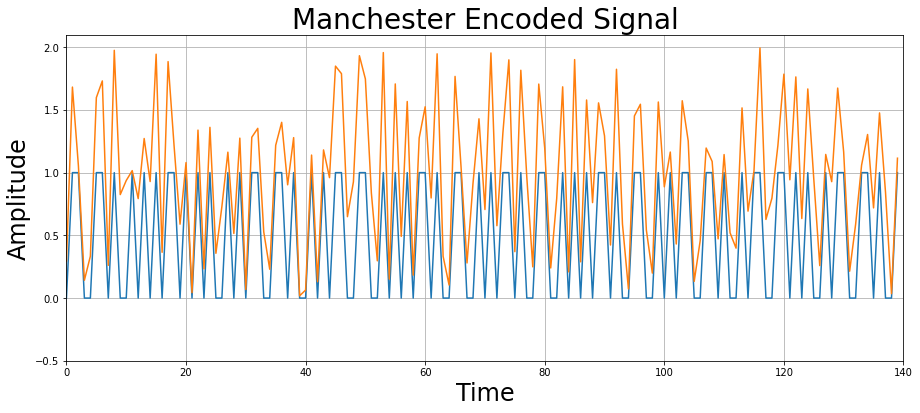

In [ ]:
get_signalGraph(ManchesterSignal,Noisy_ManchesterSignal)

**Manchester Decoding Scheme:**

Manchester decoding can be done in multiple ways involving the polarity invert with serial data, timing-based decoding, sampling-based decoding, In-phase and Quadrature convolution, VHDL implementation etc. [10]. All these decoding techniques implement either synchronization or multiple timer-based translations over modulated data bits. However, the reverse procedure of doing the XOR logical application on the signalling bits is the simplest approach of deriving the data at the receiver end. In order to accomplish this, the XOR operation of clock signal bits with the Manchester encoded signal bits will produce the data bits.

The main steps involved in the decoding process are:
1.	Get the Manchester encoded signal and create a clock variable for the length of the signal. 
2.	The clock bits and the Manchester signal bits will undergo XOR logic operation to yield the data bits in duplicated format.
3.	Eliminate the duplicates bits (that are sequencing after every bit) from the binary data.
4.	Convert the binary data to string output and compare.

The following method will do all the above stated operations one after the other. 

**Note:** A snippet in this method is added so that, when a noisy signal is decoded into the ASCII format, the bits that are other than zero and one are considered as undefined characters which fails at the XOR operation and the output comes up as an indeterminate word everytime it is executed. So, the bits that are in float format are converted to integers and modified to form a binary bit. 

In [ ]:
def decode(signal):
    #creating the clock signal from given signal
    signal_length=len(signal)
    t_time= np.arange(signal_length) #array of all time slots plotted on X-axis
    clock = t_time % 2  # array with series of 1's and 0's

    #check for noisy signal and convert the bits to have positive amplitude to perform XOR
    if isinstance(signal[1],float)==True:
      signal = [round(x) for x in signal] # rounding of the bits to make as integers
      # converting the bits greater than 1 to 1
      for n,i in enumerate(signal):
        if i > 1:
          signal[n]=1

    #apply reverse XOR on clock and the Manchester encoded signal to get data values
    bool_outputs= np.logical_xor(clock, signal) # XOR of two arrays returns True/False values
    data_duplicate = 1 - bool_outputs 

    #omit the duplicate bit values
    data=[]
    data=data_duplicate[::2]

    #make data bits list to string to convert into string
    bits_string=""
    for i in range(0,len(data)):
        bits_string +=str(data[i])

    original_text=Convert_toString(bits_string)

    # print(signal)

    return original_text

The following method converts a string of binary bits into ascii form and returns in a string format. A part of this method code was taken from (Singh, 2019) [13]

In [ ]:
def Convert_toString(bits):
   n=int(bits,2)
   text= ''
   for i in range(0, len(bits), 7): 
       temp_data = bits[i:i + 7] 
       decimal_data = int(temp_data,2)
       text = text + chr(decimal_data)
   return text

In [ ]:
normalsignal=decode(ManchesterSignal)
noisysignal=decode(Noisy_ManchesterSignal)

print(normalsignal)
print(noisysignal)

Saikeerthi
P )CdbT@A


The below method takes the correct message and error message to do a character wise compare operation between both the messages. When the compared characters conflict each other, the variance is added up to calculated the overall difference as SNR percentage.
A module of this code was taken from (Vishal, 2019)[16]

In [ ]:
def SNRpercentage(original,noisy):
  variance=0
  percentage_value=0
  message_length=len(original)
  for x in range(message_length):
    if original[x]!=noisy[x]:
      variance = variance +1

  percentage_value=(variance/message_length) * 100
  return percentage_value


In [ ]:
percentValue=SNRpercentage(normalsignal,noisysignal)
print(percentValue)

100.0


The following method would repeat the encode and decode function calls for both the proper signal and noise added signal respectively. 

**Note:** Before the function call of this method, the 'encodeWithNoise' method was modified (commented the 'viewAllSignals' method) at a place to not return the plot view of all the signals for every message transmission. This is done because, the iteration should not effect the addition of percentages to the list, when this method is execute in a series (during the runtime of whole program)

In [ ]:
#repeat the encoding and decoding of the message
def get_SNRlist(text, limit):
  snr_percentageslist=[]
  for i in range(0,limit):
    goodsignal,noisysignal=encodeWithNoise(text)
    x = decode(goodsignal)
    y = decode(noisysignal)
    print(x,y)
    snr_percentageslist.append(SNRpercentage(x,y))  
  return snr_percentageslist 


In [ ]:
# call the get_SNRlist function for 15 times
snrlist=get_SNRlist(originalString,15)

print(snrlist)
print(len(snrlist))

Saikeerthi  h@e`P@	
Saikeerthi SA@
@pI
Saikeerthi  aH*!A @ i
Saikeerthi !@adr  A
Saikeerthi A	kDa4(A
Saikeerthi C`)!e!p`h
Saikeerthi  i Apd(i
Saikeerthi C````"T`I
Saikeerthi AA(+ !r h
Saikeerthi aI@ !2T `
Saikeerthi aH) 2 (h
Saikeerthi C@	jaP$ @
Saikeerthi Ca !Dh@
Saikeerthi B He t(!
Saikeerthi B H)!E 0(
[90.0, 90.0, 80.0, 90.0, 90.0, 90.0, 80.0, 100.0, 90.0, 90.0, 90.0, 100.0, 80.0, 80.0, 100.0]
15


A part of the below method was understood and implemented from the Matplot library. (This stem plot helps to identify the distribution of the varying percentage values as the leaves nodes on the stem top.) 

In [ ]:
def  plotSNRdistribution(SNRlist, signalsNum):
  fig = plt.figure(figsize = (15,6))
  stems = np.arange(1,signalsNum+1)

  plt.xlabel('Number of Noisy transmissions')
  plt.ylabel('Error Percentage')
  plt.stem(stems, SNRlist, '-.')


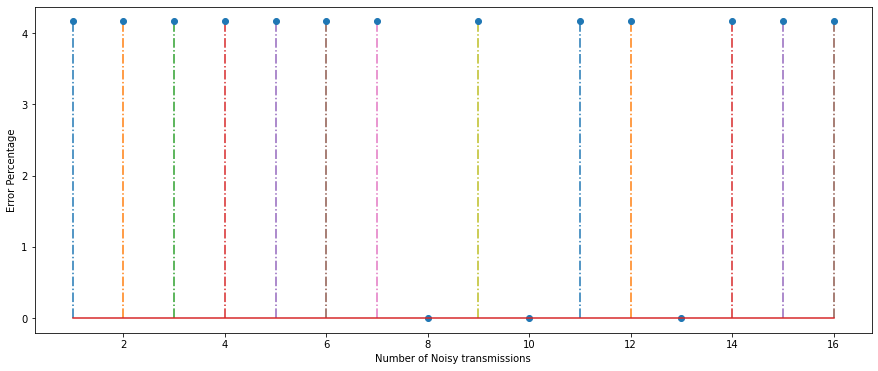

In [ ]:
samlist = [4.166,4.166,4.166,4.166,4.166,4.166,4.166,0,4.166,0,4.166,4.166,0,4.166,4.166,4.166]
plotSNRdistribution(samlist,len(samlist))

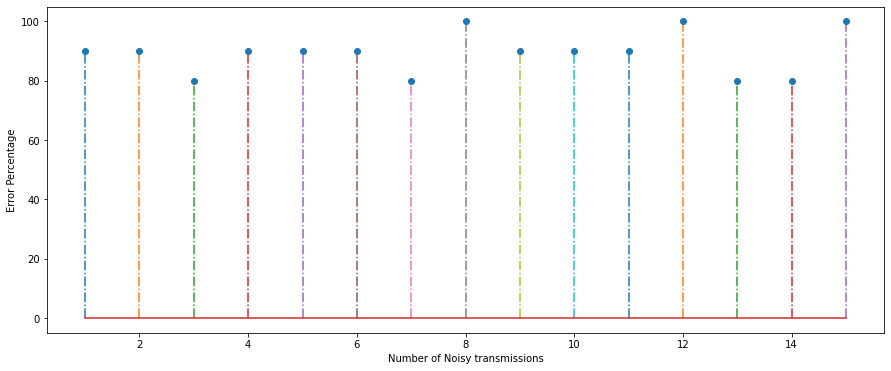

In [ ]:
#the warnings returned by this plot are caught by the filter object
plotSNRdistribution(snrlist,len(snrlist))


**Observations:**
1. In the graph plot of Original manchester signal and the noisy signal, the amplitude of noisy signal appears to have the higher amplitude range (double) when compared with the other, (as it was literally added to the original signal). The consistency in the noisy signal amplitude also signifies to be the white noise from the concepts mentioned in the website [17].
2. The SNR percentages list values are according to the level of bits matching between the original signal and the noise signal. When all the characters in the decoded message are mismatched, then it yielded in 100% ratio of error percentage between the messages. Likewise, the ratio dropped to 70% when there were 3 matching characters in both the decoded messages. 
3.  *Robustness of Encoding-Decoding process:* When the original noisy signal was decoded, it resulted in a word containing all unreadable characters every single time. Then it was recognized that trival conversions involved during the decoding process fails if they exceed the original amplitude range. So, additional steps like bounding the amplitude closer to the required range are converted to proceed further. 
4. The insights from the received noisy messages suggests that they are going to use a complex forward error correcting (FEC) algorithm to decode the signal bits free from noise and transmit the original message. 

**References:**


[Please click on the link to view all the references](https://drive.google.com/file/d/16ihHyXe-QBP7jrkKgNFShFnWf8I9TWmt/view?usp=sharing)


[14] “How to Compare Two Strings in Python.” Educative: Interactive Courses for Software Developers, www.educative.io/edpresso/how-to-compare-two-strings-in-python. Accessed 24 July 2020.

‌[15] Manjeet. “Generating Random Number List in Python.” GeeksforGeeks, 5 Jan. 2019, www.geeksforgeeks.org/generating-random-number-list-in-python/. Accessed 23 July 2020.

[16]Vishal. “SciPy Stats.Signaltonoise() Function | Python.” GeeksforGeeks, 18 Feb. 2019, www.geeksforgeeks.org/scipy-stats-signaltonoise-function-python/. Accessed 25 July 2020.

[17]“Spectrum Analysis of Noise | Spectral Audio Signal Processing.” Www.Dsprelated.Com, www.dsprelated.com/freebooks/sasp/Spectrum_Analysis_Noise.html. Accessed 27 July 2020.

‌

‌

**Name :** Sai Keerthi Mettu

**Student Id :** 200416252

 **Email** : smj102@uregina.ca

 (added at the end to avoid alignment issues)